 
# Video Games Sales Data Analysis

# Introduction
I work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. I need to identify patterns that determine whether a game succeeds or not. This will allow me to spot potential big winners and plan advertising campaigns; imagining that it’s December 2016 and I'm planning a campaign for 2017.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-Open-the-data-file-and-study-the-general-information" data-toc-modified-id="Step-1.-Open-the-data-file-and-study-the-general-information-1">Step 1. Open the data file and study the general information</a></span><ul class="toc-item"><li><span><a href="#Interim-conclusion" data-toc-modified-id="Interim-conclusion-1.1">Interim conclusion</a></span></li></ul></li><li><span><a href="#Step-2.-Preparing-the-data" data-toc-modified-id="Step-2.-Preparing-the-data-2">Step 2. Preparing the data</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-missing-values-and-converting-data-to-required-types" data-toc-modified-id="Dealing-with-missing-values-and-converting-data-to-required-types-2.1">Dealing with missing values and converting data to required types</a></span></li><li><span><a href="#Interim-conclusion" data-toc-modified-id="Interim-conclusion-2.2">Interim conclusion</a></span></li></ul></li><li><span><a href="#Step-3.-Analyze-the-data" data-toc-modified-id="Step-3.-Analyze-the-data-3">Step 3. Analyze the data</a></span></li><li><span><a href="#Step-4.-Create-a-user-profile-for-each-region" data-toc-modified-id="Step-4.-Create-a-user-profile-for-each-region-4">Step 4. Create a user profile for each region</a></span></li><li><span><a href="#Step-5.-Testing-hypotheses" data-toc-modified-id="Step-5.-Testing-hypotheses-5">Step 5. Testing hypotheses</a></span><ul class="toc-item"><li><span><a href="#Hypothesis-test-1" data-toc-modified-id="Hypothesis-test-1-5.1">Hypothesis test 1</a></span></li><li><span><a href="#Hypothesis-test-2" data-toc-modified-id="Hypothesis-test-2-5.2">Hypothesis test 2</a></span></li></ul></li><li><span><a href="#Step-6.-General-conclusion" data-toc-modified-id="Step-6.-General-conclusion-6">Step 6. General conclusion</a></span></li></ul></div>

## Step 1. Open the data file and study the general information

Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats as st
import missingno as msno
%matplotlib inline
pd.set_option('mode.chained_assignment', None) # To control for SettingWithCopyWarning


data = pd.read_csv("games.csv")

from io import BytesIO
import requests
spreadsheet_id = '1X07QmTmiVfOeGT2Cr_Gom9NdsYsAcpJOxhLd6sa9Nb4' #External data
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
ex_data = pd.read_csv(BytesIO(r.content))

Previewing general information and description of data

In [2]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14667,Drome Racers,GC,2003.0,Racing,0.02,0.01,0.00,0.00,54.0,6.6,E
13934,Holly Hobbie & Friends,DS,2007.0,Misc,0.04,0.00,0.00,0.00,NaN,NaN,NaN
2513,I Spy: Fun House,DS,2007.0,Puzzle,0.76,0.00,0.00,0.06,53.0,tbd,E
3264,Tiger Woods PGA Tour 12: The Masters,X360,2011.0,Sports,0.40,0.16,0.00,0.05,80.0,6.1,E
13634,Naruto Shippuuden: Shinobi Retsuden III,DS,2009.0,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
data.describe(include=object)

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


### Interim conclusion
It can be seen that the column names are not in lowercase characters. The general information shows there are missing values in `Name`,`Year_of_Release`,`Genre`,`Critic_Score`,`User_Score`, and `Rating` columns that are floating-point values `NaN`.The `Year_of_Release` column should be an integer data type not a float as it only contains whole numbers. `User_Score` should be a float data type not an object. Aside these columns, all other columns are in their required data types. The data description shows there are potential outliers in the data. 

`User_Score` is not appearing in the numerical data description as it is being recognised as an object. It therefore appears in the object data description. At first glance, it can be seen that the `User_Score` contains a string `tbd`. The most occuring game name is `Need for Speed: Most Wanted`. `PS2` is a dominant platform as `Action` is a dominant Genre. The ESRB rating `everyone` is the most frequent rating. 

## Step 2. Preparing the data

### Dealing with missing values and converting data to required types

Converting columns to lowercase charaters

In [7]:
data.columns=data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Due to enormous missing values in `Critic_Score`,`User_Score`, `Rating`, and to some extent `Year_of_Release` columns,
there is the need to investigate and deal with them appropriately. The first approach is to reply on 
 use of external sources of information, I have therefore, imported (see external data in the beginning cell) an edited dataset based on reviews from Metacritic, i.e. [kaggle_dataset](https://www.kaggle.com/jummyegg/rawg-game-dataset)   

Previewing first five rows of the external data

In [8]:
ex_data.head()

,name,metacritic,released,rating,esrb_rating
0,D/Generation HD,NaN,10/23/2015,0.0,Everyone 10+
1,G Prime Into The Rain,NaN,1/6/2016,0.0,Everyone
2,Land Sliders,NaN,9/24/2015,0.0,Everyone 10+
3,Pixel Gear,NaN,10/20/2016,0.0,Teen
4,Gods and Idols,NaN,12/12/2016,0.0,NaN


Converting names in the `name` column in both DataFrames to lowercase characters to avoid mismatch when mapping external data with internal data.

In [9]:
data["name"]=data["name"].str.lower()
ex_data["name"]= ex_data["name"].str.lower()

Previewing general information of external data

In [10]:
ex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474417 entries, 0 to 474416
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   name         474415 non-null  object 
 1   metacritic   4733 non-null    float64
 2   released     450218 non-null  object 
 3   rating       474417 non-null  float64
 4   esrb_rating  55864 non-null   object 
dtypes: float64(2), object(3)
memory usage: 18.1+ MB


The `released` column is the date games were released and should be datatime data type. Hence, I would convert.

In [11]:
ex_data["released"]=pd.to_datetime(ex_data["released"], format ="%m/%d/%Y")
ex_data.rename(columns={"released":"release_date"}, inplace=True)
ex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474417 entries, 0 to 474416
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   name          474415 non-null  object        
 1   metacritic    4733 non-null    float64       
 2   release_date  450218 non-null  datetime64[ns]
 3   rating        474417 non-null  float64       
 4   esrb_rating   55864 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 18.1+ MB


Retrieving year of release as a new column

In [12]:
ex_data["release_year"]=ex_data["release_date"].dt.year
ex_data.head()

,name,metacritic,release_date,rating,esrb_rating,release_year
0,d/generation hd,NaN,2015-10-23,0.0,Everyone 10+,2015.0
1,g prime into the rain,NaN,2016-01-06,0.0,Everyone,2016.0
2,land sliders,NaN,2015-09-24,0.0,Everyone 10+,2015.0
3,pixel gear,NaN,2016-10-20,0.0,Teen,2016.0
4,gods and idols,NaN,2016-12-12,0.0,NaN,2016.0


Counting number of null values in columns in the internal dataframe

In [13]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Visualising Missing Values

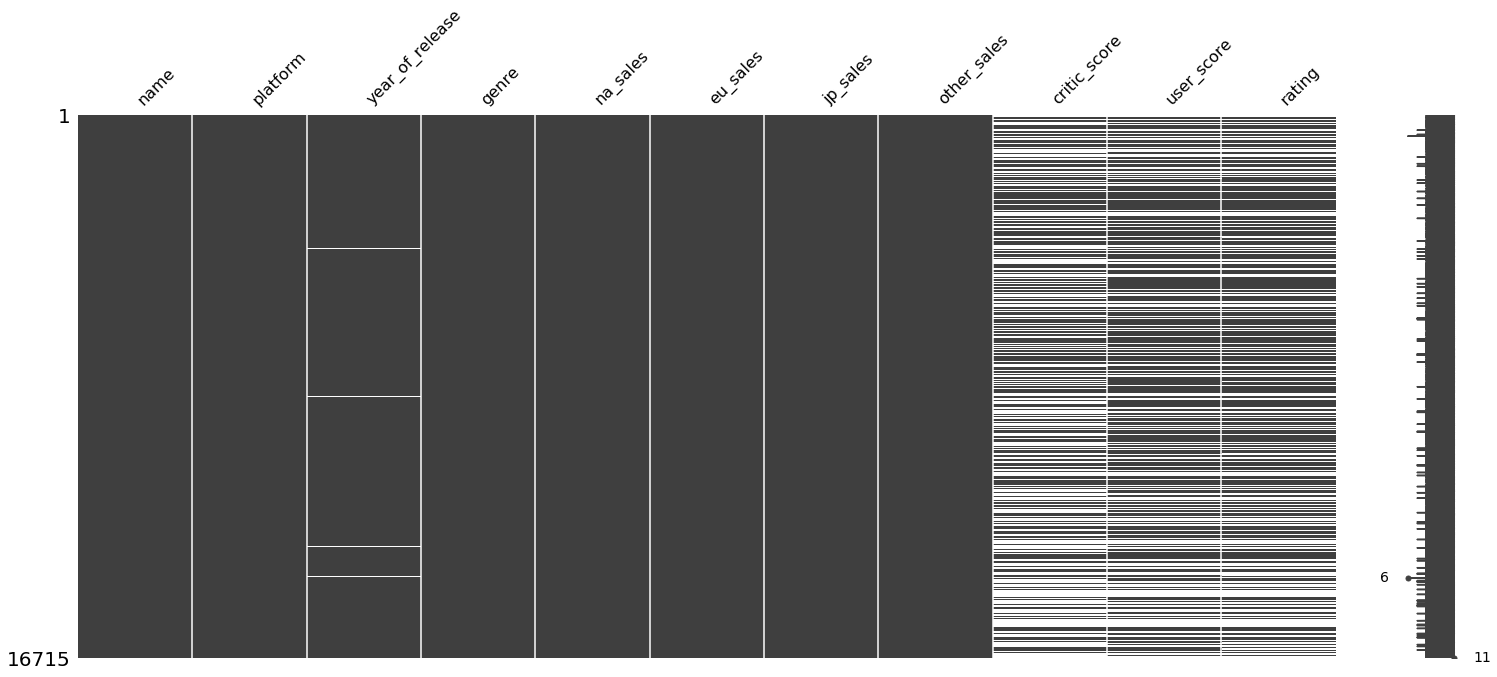

In [14]:
msno.matrix(data)
plt.show()

There are 269 missing values in the `year_of_release`. I will fill these  with the external data. I will first create a dictionary that contains name of games and released year from the external data. I will then map the dictionary with internal data to fill the missing values in the `year_of_release` column. This strategy would also be used to fill missing values in the `Critic_Score`,`User_Score`, and `Rating` columns.

In [15]:
year_dict =pd.Series(ex_data["release_year"].values,index=ex_data["name"]).to_dict()
data["year_of_release"] = data["year_of_release"].fillna(data["name"].map(year_dict))
data[data["year_of_release"].isnull()].shape[0]

79

Filling `critic_score` column with external data

In [16]:
critic_dict =pd.Series(ex_data["metacritic"].values,index=ex_data["name"]).to_dict() 
data["critic_score"] = data["critic_score"].fillna(data["name"].map(critic_dict)) 
data[data["critic_score"].isnull()].shape[0] 

8169

Filling  `user_score` column with external data

In [17]:
user_dict =pd.Series(ex_data["rating"].values,index=ex_data["name"]).to_dict()
data["user_score"] = data["user_score"].fillna(data["name"].map(user_dict))
data[data["user_score"].isnull()].shape[0]

4002

Filling `rating` column (esrb_rating) in internal column with external data

In [18]:
ex_data["esrb_rating"].unique()

array(['Everyone 10+', 'Everyone', 'Teen', nan, 'Mature', 'Adults Only',
       'Rating Pending'], dtype=object)

As the column values in the internal column for `esrb_rating` is abreviated, there is the need to abbreviate the external
data for conformity. I will do so with pandas map function.

In [19]:
ex_data["esrb_rating"]=ex_data["esrb_rating"].map({"Teen": "T", "Everyone 10+":"E10+", "Mature":"M", "Everyone":"E",\
                            "Adults Only":"AO","Rating Pending":"RP"})
ex_data["esrb_rating"].unique()

array(['E10+', 'E', 'T', nan, 'M', 'AO', 'RP'], dtype=object)

Inspecting unique values in the ESRB rating in the internal DataFrame

In [20]:
data["rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

The `K-A` rating was known as `Kids to Adults` until 1998, when it was renamed `Everyone`, i,e. `E`. Therefore, I will
replace `K-A` with `E`

In [21]:
data["rating"]=data["rating"].replace("K-A","E")
data["rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Filling missing values with external data

In [22]:
esrb_dict =pd.Series(ex_data["esrb_rating"].values,index=ex_data["name"]).to_dict()
data["rating"] = data["rating"].fillna(data["name"].map(esrb_dict))
data[data["rating"].isnull()].shape[0]

6190

Total missing values after filling with external data

In [23]:
data.isnull().sum()

name                  2
platform              0
year_of_release      79
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8169
user_score         4002
rating             6190
dtype: int64

Investigating records that do not have game names

In [24]:
data[data["name"].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,0,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,0,NaN


These two records were games released in 1993 on "GEN" platform but do no have names or genre. Clearly, the missing values in the two columns are from the same platform. 

Investigating the "GEN" platform

In [25]:
data[data["platform"]=="GEN"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,sonic the hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,4.27,E10+
257,sonic the hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,mortal kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,3.93,NaN
588,streets of rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,4.28,T
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,0,NaN
832,nba jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,3.68,E
960,sonic & knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,4.3,E
996,sonic the hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,street fighter ii': special champion edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,disney's the lion king,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,3.96,E


It is not so obvious the name and genre to fill the missing values, hence, I will drop these two records 

In [26]:
data= data.dropna(subset=["name","genre"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16634 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8546 non-null   float64
 9   user_score       12711 non-null  object 
 10  rating           10525 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Filling the 79 missing values in the year_of_release column.

Because games are usually published for specific platforms ( unless it is a "Remastered" version), I will group games by platforms and fill with the most occurring year (mode). 

In [27]:
model_rating= lambda x: x.mode().iloc[0]
data["year_of_release"]=data["year_of_release"].fillna(data.groupby("platform")["year_of_release"].transform(model_rating))
data[data["year_of_release"].isnull()].shape[0]

0

In [28]:
data["year_of_release"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983., 1979., 1977., 2017., 2020., 2019.])

The kaggle data (external data) is updated compared to the internal data. Hence, games that existed after 2016, i.e. 2017, 2019, and 2020 were also filled. I will therefore drop these records as the data for the study spans up to 2016.

In [29]:
year_drop=[2017.0,2019.0,2020.0]
for i in year_drop:
    data.drop(data[data["year_of_release"]== i].index, inplace=True)
data["year_of_release"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983., 1979., 1977.])

Dealing with remaining missing values in the review columns

In [30]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8163
user_score         4002
rating             6185
dtype: int64

The missing values in the review columns are a lot. If I decide to fill with any metric (mean, median, mode, etc), I would probable skew the results rather than improving it. It is okay that a lot of games do not have scores or ratings because they could be old or very niche. Also, each column has at least 8000 values which is enough for any analysis. 

The data description showed the `user_score`column has a string `tbd`.
Investigating the number of records with "tbd" values.

In [31]:
data[data["user_score"]=="tbd"].shape[0]

2424

There are 2424 missing values among the missing values in the `user_score` column. I will replace them with a floating point value `NaN` to smooth analysis as I can now convert the data type for `user_score`to float.

In [32]:
data["user_score"]=data["user_score"].replace("tbd", float("nan"))

Converting columns to required data types

In [33]:
data["user_score"]= data["user_score"].astype("float") 
data["year_of_release"]= data["year_of_release"].astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16706 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16706 non-null  object 
 1   platform         16706 non-null  object 
 2   year_of_release  16706 non-null  int64  
 3   genre            16706 non-null  object 
 4   na_sales         16706 non-null  float64
 5   eu_sales         16706 non-null  float64
 6   jp_sales         16706 non-null  float64
 7   other_sales      16706 non-null  float64
 8   critic_score     8543 non-null   float64
 9   user_score       10280 non-null  float64
 10  rating           10521 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Calculating total sales (the sum of sales in all regions) for each game

In [34]:
data["total_sales"] = data[["na_sales","eu_sales","jp_sales","other_sales"]].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.00,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,4.27,NaN,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.30,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.00,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Interim conclusion
Column names, and game names have been replaced with lowercase characters. External data was imported to help fill some of the missing values; remaining missing values have been dealt with, data converted to the required types, and total sales column added to DataFrame .

## Step 3. Analyze the data 

Looking at the number of games that were released in different years to see if data for every period is significant

In [35]:
df=data.pivot_table(index=["year_of_release"],values="name", aggfunc= "count")\
.reset_index().rename(columns= {"name":"number_of_games"})
df

,year_of_release,number_of_games
0,1977,2
1,1979,1
2,1980,11
3,1981,49
4,1982,37
5,1983,17
6,1984,14
7,1985,14
8,1986,21
9,1987,16


Visualising the the number of games in every period

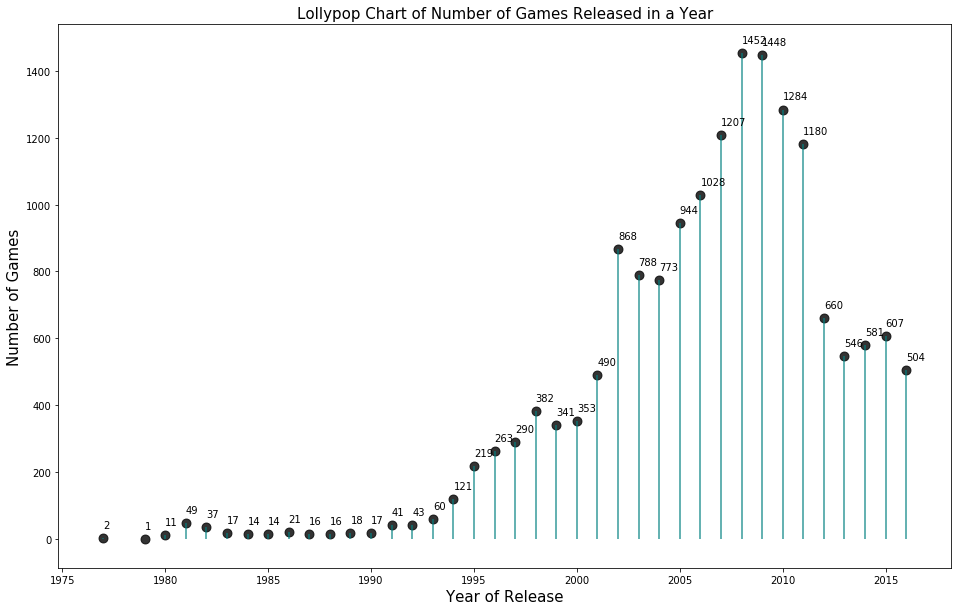

In [36]:
fig, ax = plt.subplots(figsize=(16,10))
ax.vlines(x=df["year_of_release"], ymin=0, ymax=df.number_of_games,color="teal",alpha=0.8)
ax.scatter(x=df["year_of_release"],  y= df.number_of_games, s=80,color="Black", alpha=0.8)
ax.set_title("Lollypop Chart of Number of Games Released in a Year", fontdict={"size":15})
ax.set_xticklabels(df["year_of_release"], rotation=90,minor=True ,fontdict={"horizontalalignment":"right","size":12})
plt.xlabel("Year of Release", fontdict={"size":15})
plt.ylabel("Number of Games", fontdict={"size":15})
for row in df.itertuples():
    ax.text(row.year_of_release,row.number_of_games+30, s=round(row.number_of_games,2))
plt.show()

The data for every period is not significant. For instance, data for early years of game release (from 1977 to 1990), have only one period (1981) that had more than 40 games released. Data from periods spanning from mid 1990s is significant for every period. The number of games released in a year peaked in 2008 and significantly started falling from 2010

Considering how sales varied from platform to platform. I will choose the platforms with the greatest total sales and build a distribution based on data for each year. A z-score or standard score would be calculated and added as a column to have an idea of how far from the mean a sales data point is; to help determine profitable and non-profitable platforms

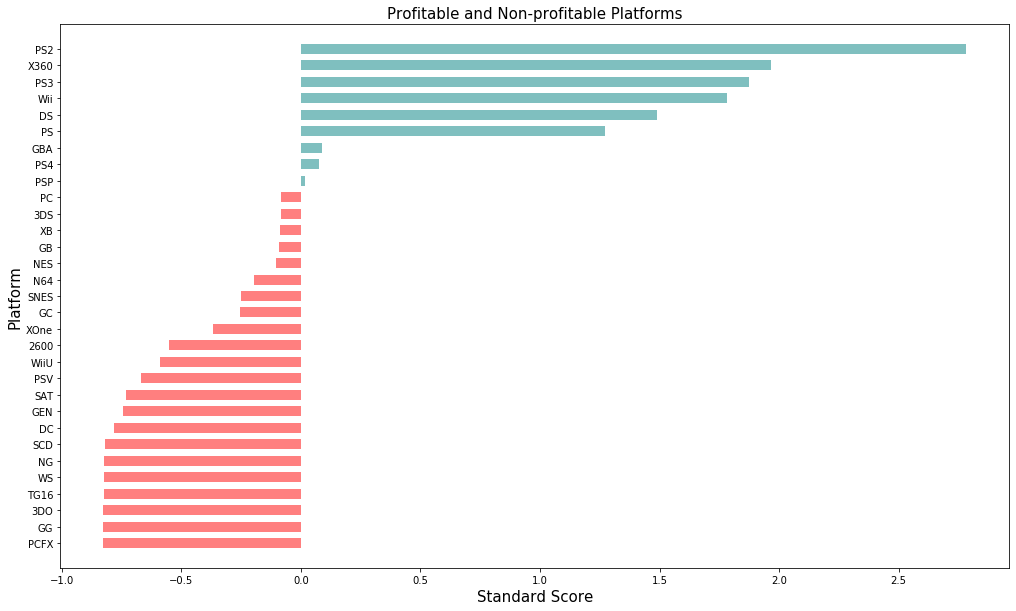

In [37]:
platform = data.pivot_table(index = "platform", values = "total_sales", aggfunc="sum")
platform["sales_zscore"] = (platform["total_sales"] - platform["total_sales"].mean())/platform["total_sales"].std()
platform["colours"] = ["red" if x < 0 else "teal" for x in platform["sales_zscore"]]
platform.sort_values(by="sales_zscore", inplace = True)

fig, ax = plt.subplots(figsize=(17,10))
plt.hlines(y = platform.index,xmin = 0, xmax = platform.sales_zscore,color=platform.colours, alpha=0.5, linewidth=10)
ax.set_title("Profitable and Non-profitable Platforms", fontdict={"size":15})
plt.xlabel("Standard Score",fontdict={"size":15})
plt.ylabel("Platform",fontdict={"size":15})
plt.show()

The greatest performing platforms are 'PS2', 'X360', 'PS3', 'Wii', 'DS', and 'PS'. The PS2 platform is the leading plaform in total game sales. 

Building a distribution for these platforms for each year. The distribution will display platforms that **used to be popular but now have zero sales.**

In [38]:
Greatest_platforms = platform.sort_values(by="total_sales",ascending=False)[:6]
Greatest_platforms = Greatest_platforms.index.tolist()
selected_platforms = data.query("platform in @ Greatest_platforms") 
selected_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [39]:
selected_platform = selected_platforms.pivot_table(index="year_of_release", values= "total_sales", columns = "platform", aggfunc= "sum")
selected_platform

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,0.17,NaN,NaN
1989,NaN,NaN,0.17,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,171.08,NaN,NaN,NaN,NaN
1999,NaN,145.58,NaN,NaN,NaN,NaN


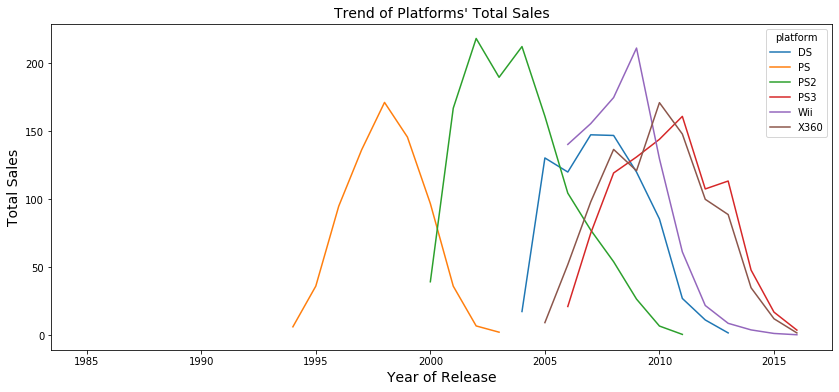

In [40]:
fig, ax = plt.subplots(figsize=(14,6))
selected_platform.plot(kind = "line", use_index= True, ax=ax)
ax.set_title("Trend of Platforms' Total Sales", fontdict={"size":14})
plt.xlabel("Year of Release", fontdict={"size":14})
plt.ylabel("Total Sales", fontdict={"size":14})
plt.show()

PS dominated the games market in the 1990s and early 2000s but now have zero sales. PS2 tookover from the early 2000 and dominated the market till after 2005, i.e. when Nintendo DS and Wii plaforms tookover. PS, PS2, and Nintendo DS used to be popular platforms but now have zero sales.

**How long does it generally take for new platforms to appear and old ones to fade?**

I will create a dataframe that includes the initial year games were released, the last year it existed,the duration of their existence, and a count of the years each platform ever made sales (when a platform does not make sales any longer, it is assumed to has faded). 

In [41]:
first_release= data.pivot_table(index='platform',values ='year_of_release',aggfunc='min').reset_index()\
.sort_values(by='year_of_release').rename(columns={"year_of_release":"initial_year"})

last_existed = data.pivot_table(index='platform',values ='year_of_release',aggfunc='max').reset_index()\
.sort_values(by='year_of_release').rename(columns={"year_of_release":"last_year"})

platform_sales= data.pivot_table(index="year_of_release", columns='platform',values ='total_sales',aggfunc='sum')
sales_year_count=platform_sales.apply(lambda column: (column.notnull()).sum())
sales_year_count_df = pd.DataFrame({"platform": sales_year_count.index,'sales_count':sales_year_count.values})

platform_df=pd.merge(first_release,last_existed, on='platform')
platform_df["duration"] = platform_df["last_year"] - platform_df["initial_year"]
platform_df1= pd.merge(platform_df, sales_year_count_df,on='platform')

platform_df1

,platform,initial_year,last_year,duration,sales_count
0,2600,1977,2012,35,16
1,NES,1983,1994,11,12
2,DS,1985,2013,28,11
3,PC,1985,2016,31,26
4,GB,1988,2001,13,13
5,PS3,1988,2016,28,12
6,PS2,1989,2011,22,13
7,SNES,1990,1999,9,10
8,GEN,1990,1994,4,5
9,GG,1992,1992,0,1


In [42]:
round(platform_df1["sales_count"].mean())

8

Glacing through the initial years of release column, it can be seen that from 1988 to 2013, in majority of the years, 
there were release of games and a few gaps in years. A good number of the years also have at least two games released. I can therefore conclude that generally, it takes about a year or less for new platforms to appear. An average of the sales
count each year on platforms showed that on average, old plaforms take about 8 years to fade. Considering the lifespan of a plaform, Atari 2600 plaform existed for the longest number of years (35). 

**Determining what period to take data for to help build a prognosis for 2017.**

Considering that the number of games released in a year peaked in 2008 and only significantly started falling from 2010 onwards, I will take data from 2010 as there is a trend that would help build prognosis for 2017.

In [43]:
relevant_data=data.query("year_of_release >= 2010")
relevant_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,kinect adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,pokemon black/pokemon white,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,call of duty: modern warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


Platforms leading in sales

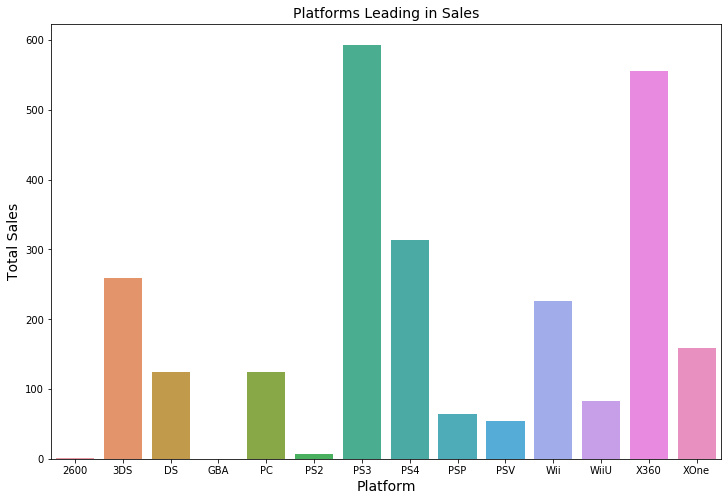

In [44]:
high_sales = relevant_data.pivot_table(index = "platform", values = "total_sales", aggfunc="sum")
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.barplot(x=high_sales.index, y= "total_sales", data=high_sales)  
ax.set_title("Platforms Leading in Sales", fontdict={"size":14})
plt.xlabel("Platform", fontdict={"size":14})
plt.ylabel("Total Sales", fontdict={"size":14})
plt.show()

The most profitable platforms are 'PS3', '3DS', 'DS',  'PC',   'PS4', 'Wii', 'X360',  and 'XOne'.
'PS3' and 'X360' are leading in sales.

Which plaforms are growing or shrinking?

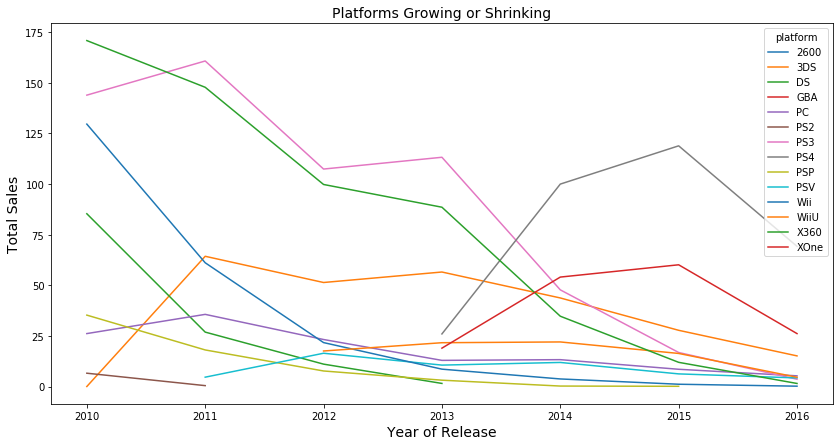

In [45]:
platform_trend= relevant_data.pivot_table(index="year_of_release", values= "total_sales",columns="platform", aggfunc="sum")
fig, ax = plt.subplots(figsize=(14,7))
platform_trend.plot(kind = "line", use_index= True, ax=ax)
ax.set_title("Platforms Growing or Shrinking", fontdict={"size":14})
plt.xlabel("Year of Release", fontdict={"size":14})
plt.ylabel("Total Sales", fontdict={"size":14})
plt.show()

In 2016, all plaforms had experienced their peak sales and started shrinking, but PS4, XOne, and 3DS were leading 
in sales.


Building a boxplot for the global sales of all games, broken down by platform

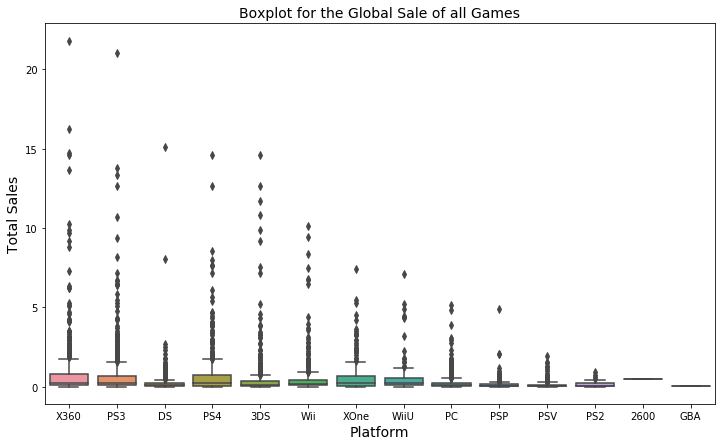

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(12,7)
sns.boxplot(x="platform",y="total_sales", data = relevant_data)
ax.set_title("Boxplot for the Global Sale of all Games", fontdict={"size":14})
plt.xlabel("Platform", fontdict={"size":14})
plt.ylabel("Total Sales", fontdict={"size":14})
plt.show()

The boxes look small due to enormous existence of outliers in the data. I will remove outliers and replot the graph.

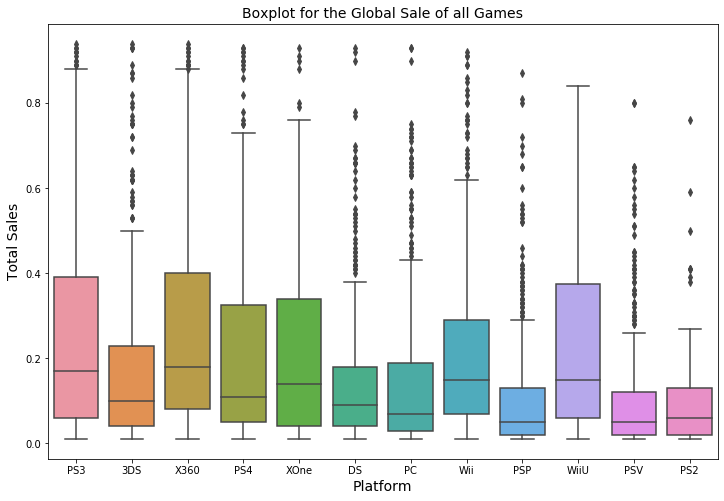

In [47]:
relevant_data_filter=relevant_data.query("platform != 'GBA' & platform != '2600'")# droping bottom sales platforms
Q1 = relevant_data_filter["total_sales"].quantile(0.25)
Q3 = relevant_data_filter["total_sales"].quantile(0.75)
IQR = Q3 - Q1

filtered_platforms = relevant_data_filter[relevant_data_filter["total_sales"] < (Q3 + 1.5 * IQR)]

fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.boxplot(x="platform",y="total_sales", data = filtered_platforms)
ax.set_title("Boxplot for the Global Sale of all Games", fontdict={"size":14})
plt.xlabel("Platform", fontdict={"size":14})
plt.ylabel("Total Sales", fontdict={"size":14})
plt.show()

Differences in sales do not differ much as the median values across plaforms all below USD 0.2 million. Howevet, the middle half values for PS3, X360, XOne, WiiU, and PS4 are the largest compared to the others. X360 has the highest median sales value. PSP and PSV has the lowest median values.

Average sales on various platforms 

In [48]:
average_sales=relevant_data.pivot_table(index="platform",values="total_sales").reset_index().rename(columns={"total_sales":"average_sales"})
average_sales

,platform,average_sales
0,2600,0.460000
1,3DS,0.498077
2,DS,0.244325
3,GBA,0.050000
4,PC,0.254207
5,PS2,0.153043
6,PS3,0.652319
7,PS4,0.801378
8,PSP,0.128586
9,PSV,0.125744


Average sales on various platforms also differs but not significantly different especially among the highest performing plaforms as average sales are all below USD 1.00 million.
PS4 has the highest average sales of about USD 0.80 million, and GBA having about USD 0.05 million sales.

**Considering how user and professional reviews affect sales for one popular platform**

I will choose PS3 as in sum total, it is leading in sales. 
I will build scatter plots and calculate the correlation between user and professional reviews, and sales.

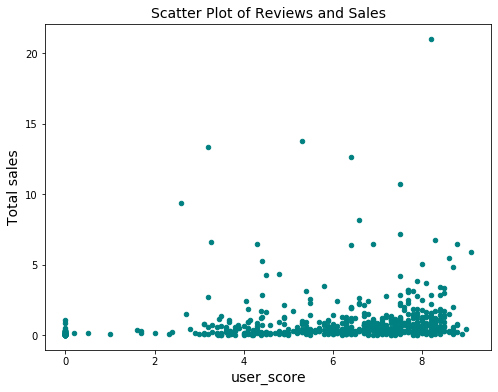

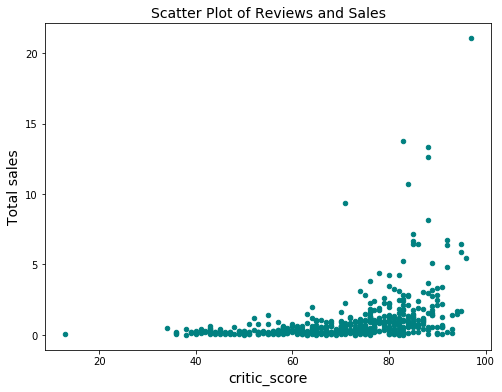

In [49]:
ps3= relevant_data[relevant_data["platform"]=="PS3"]
for_scatter = ["user_score","critic_score"]
for i in for_scatter:
    fig, ax = plt.subplots(figsize=(8,6))
    ps3.plot(y="total_sales", x= i, color="teal", kind="scatter", alpha=1,ax=ax)
    ax.set_title("Scatter Plot of Reviews and Sales", fontdict={"size":14})
    plt.xlabel(i, fontdict={"size":14})
    plt.ylabel("Total sales", fontdict={"size":14})
    plt.show()

**A correlation between sales, and user and professional reviews implies correlation between categorical and continuous (quantitative) variables. Hence, I will use the point biserial correlation.** 

In [50]:
ps3=ps3.query('user_score!= "nan" & critic_score!= "nan"') # filtering out 'NaNs' to make calculations possible
print("Correlation between total sales and user score: {}".format(st.pointbiserialr(ps3["total_sales"],ps3["user_score"])))
print()
print("Correlation between total sales and critic score: {}".format(st.pointbiserialr(ps3["total_sales"],ps3["critic_score"])))

Correlation between total sales and user score: PointbiserialrResult(correlation=0.0637148886040583, pvalue=0.14410302916079762)

Correlation between total sales and critic score: PointbiserialrResult(correlation=0.3731262398917231, pvalue=7.475065387306873e-19)


The scatter plots and the biserial correlation show there are positive correlations between sales of PS3 platform and reviews. The pvalue shows that the correlation between  total sales and professional reviews is statistically significant. Thus, higher professional reviews usually correspond with more sales. User reviews have a positive but insignificant correlation with sales of the PS3 platform. 

**Comparing the sales of the same games on other platforms**

I will consider platforms such as x360, XOne, and PS4.

In [51]:
other_platforms=relevant_data.query('platform != "PS3"')
other_platforms= other_platforms[["platform","total_sales","user_score","critic_score"]]
x360= other_platforms[other_platforms["platform"]=='X360']
x360=x360.query('user_score!= "nan" & critic_score!= "nan"') # filtering out 'NaNs' to make calculations possible 
print("Correlation between total sales and user score: {}".format(st.pointbiserialr(x360["total_sales"],x360["user_score"])))
print()
print("Correlation between total sales and critic score: {}".format(st.pointbiserialr(x360["total_sales"],x360["critic_score"])))

Correlation between total sales and user score: PointbiserialrResult(correlation=0.052595905105095986, pvalue=0.2500984479712616)

Correlation between total sales and critic score: PointbiserialrResult(correlation=0.3258352392928062, pvalue=2.464791902407965e-13)


In [52]:
xone= other_platforms[other_platforms["platform"]=='XOne']
xone=xone.query('user_score!= "nan" & critic_score!= "nan"') # filtering out 'NaNs' to make calculations possible
print("Correlation between total sales and user score: {}".format(st.pointbiserialr(xone["total_sales"],xone["user_score"])))
print()
print("Correlation between total sales and critic score: {}".format(st.pointbiserialr(xone["total_sales"],xone["critic_score"])))

Correlation between total sales and user score: PointbiserialrResult(correlation=-0.019211511142128868, pvalue=0.7919418637862915)

Correlation between total sales and critic score: PointbiserialrResult(correlation=0.36757054231294506, pvalue=1.687237002964629e-07)


In [53]:
ps4= other_platforms[other_platforms["platform"]=='PS4']
ps4=ps4.query('user_score!= "nan" & critic_score!= "nan"')
print("Correlation between total sales and user score: {}".format(st.pointbiserialr(ps4["total_sales"],ps4["user_score"])))
print()
print("Correlation between total sales and critic score: {}".format(st.pointbiserialr(ps4["total_sales"],ps4["critic_score"])))

Correlation between total sales and user score: PointbiserialrResult(correlation=0.009338476583563515, pvalue=0.8757133276472665)

Correlation between total sales and critic score: PointbiserialrResult(correlation=0.3814081131814896, pvalue=3.1243024127531994e-11)


The outputs from the additional platforms selected compared to the chosing one (PS3) indicate there are positive and statistically significant relationships (correlation) between professional reviews of plaforms and sale of games' platforms while there are positive and statistically insignificant correlation between user reviews of plaforms and sale of games' platforms. This is because professional reviews are done before a platform is released so it relates highly with the customers' decision (first impression). However, the user reviews are only done after platforms are already selling in the market. It has a relationship with future sales but based on the pvalues, the relationship is not statistically significant.

**Considering the general distribution of games by genre.** 

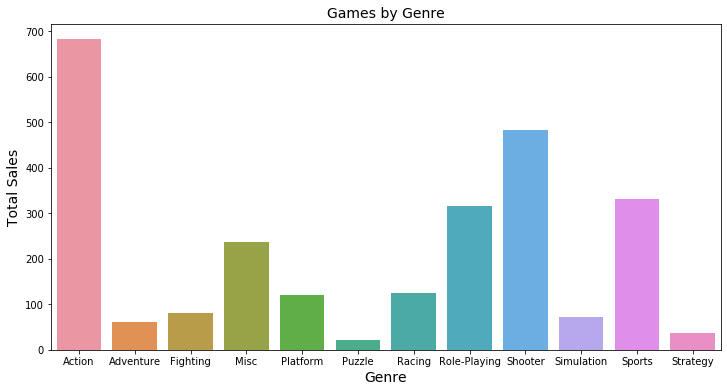

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
games_by_genre = relevant_data.pivot_table(index = "genre", values = "total_sales", aggfunc="sum")

sns.barplot(x=games_by_genre.index, y="total_sales", data=games_by_genre,  capsize=10)
ax.set_title("Games by Genre", fontdict={"size":14})
plt.ylabel("Total Sales", fontdict={"size":14})
plt.xlabel("Genre", fontdict={"size":14})
plt.show()

Generally, action genres are the most profitable (about USD 700.00 million). This is followed by shooter , sports, role-playing, and Misc genre. Low profitable genres are Puzzle, Adventure, and Strategy. The least profitable game genre is Puzzle.

Investigating profitable genres based on averages

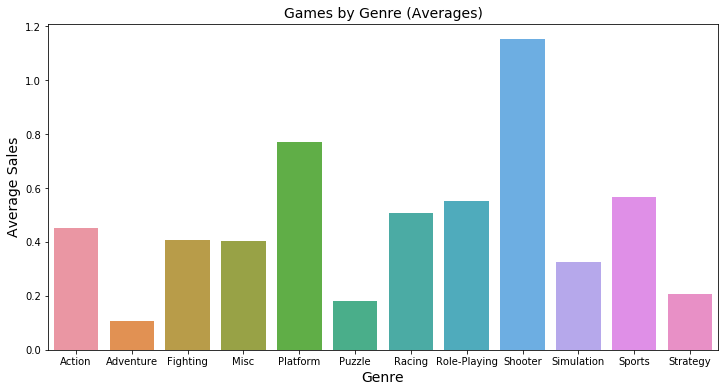

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
games_by_genre = relevant_data.pivot_table(index = "genre", values = "total_sales")
sns.barplot(x=games_by_genre.index, y="total_sales", data=games_by_genre, ax=ax, capsize=10)
ax.set_title("Games by Genre (Averages)", fontdict={"size":14})
plt.ylabel("Average Sales", fontdict={"size":14})
plt.xlabel("Genre", fontdict={"size":14})
plt.show()

On average, the most profitable genre is Shooter. Action, sports,role-playing, and Misc is still among the highly profitable genres on average. The low profitable genres on average are Adventure, Puzzle, and Strategy. 
These means that, in general, Shooter, Action, sports, Role-playing, and Misc genres are more profitable while 
Adventure, Puzzle, and Strategy are least profitable genres.

## Step 4. Create a user profile for each region

**Determining top five platforms', and genres' market share for each region (NA, EU, JP).**

**Top five platforms.**

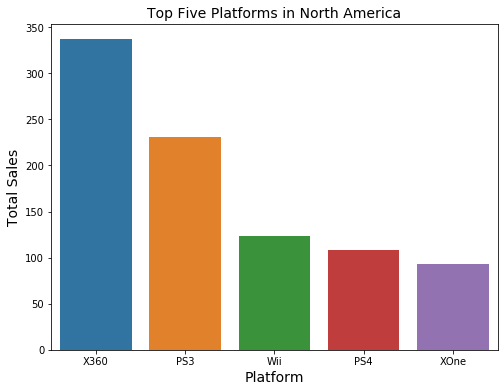

In [56]:
platform_na = relevant_data.pivot_table(index = "platform", values="na_sales", aggfunc="sum")\
.sort_values(by="na_sales", ascending=False)[:5]
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.barplot(x=platform_na.index, y="na_sales", data=platform_na, ax=ax, capsize=10)
ax.set_title("Top Five Platforms in North America", fontdict={"size":14})
plt.ylabel("Total Sales", fontdict={"size":14})
plt.xlabel("Platform", fontdict={"size":14})
plt.show()

X360 platform is leading in sales in North America. This is followed by PS3.

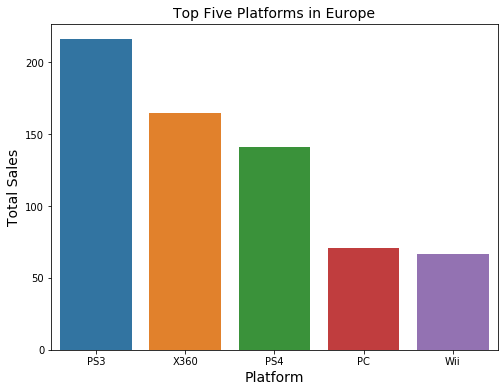

In [57]:
platform_eu = relevant_data.pivot_table(index = "platform", values="eu_sales", aggfunc="sum")\
.sort_values(by="eu_sales", ascending=False)[:5]
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.barplot(x=platform_eu.index, y="eu_sales", data=platform_eu, ax=ax, capsize=10)
ax.set_title("Top Five Platforms in Europe", fontdict={"size":14})
plt.ylabel("Total Sales", fontdict={"size":14})
plt.xlabel("Platform", fontdict={"size":14})
plt.show()

PS3 platform is leading in sales in Europe. This is followed by X360 platform. This implies, PS3 and X360 platforms dominate sales in Europe and North American markets.

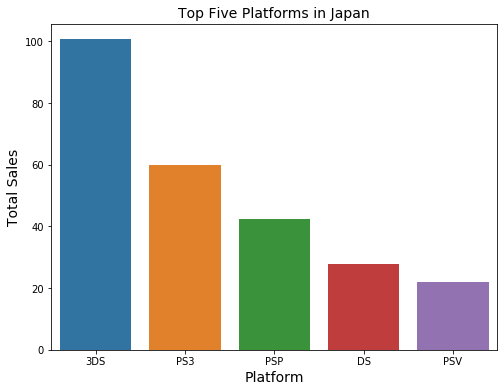

In [58]:
platform_jp = relevant_data.pivot_table(index = "platform", values="jp_sales", aggfunc="sum")\
.sort_values(by="jp_sales", ascending=False)[:5]
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.barplot(x=platform_jp.index, y="jp_sales", data=platform_jp, ax=ax, capsize=10)
ax.set_title("Top Five Platforms in Japan", fontdict={"size":14})
plt.ylabel("Total Sales", fontdict={"size":14})
plt.xlabel("Platform", fontdict={"size":14})
plt.show()

Nintendo 3DS platform is leading in sales in Japan. This is followed by PS3 platform. This implies, PS3 is at least
among top two dominating market shares across all three regions.

**The top five genres.**

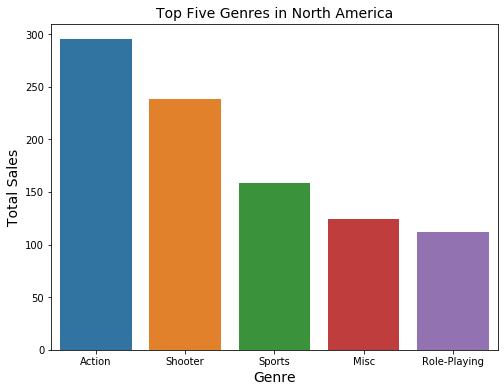

In [59]:
platform_na = relevant_data.pivot_table(index = "genre", values="na_sales", aggfunc="sum")\
.sort_values(by="na_sales", ascending=False)[:5]
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.barplot(x=platform_na.index, y="na_sales", data=platform_na, ax=ax, capsize=10)
ax.set_title("Top Five Genres in North America", fontdict={"size":14})
plt.ylabel("Total Sales", fontdict={"size":14})
plt.xlabel("Genre", fontdict={"size":14})
plt.show()

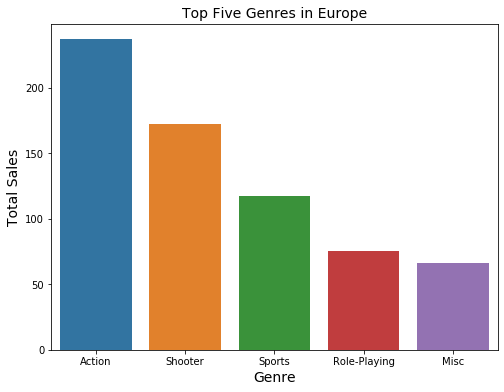

In [60]:
platform_eu = relevant_data.pivot_table(index = "genre", values="eu_sales", aggfunc="sum")\
.sort_values(by="eu_sales", ascending=False)[:5]
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.barplot(x=platform_eu.index, y="eu_sales", data=platform_eu, ax=ax, capsize=10)
ax.set_title("Top Five Genres in Europe", fontdict={"size":14})
plt.ylabel("Total Sales", fontdict={"size":14})
plt.xlabel("Genre", fontdict={"size":14})
plt.show()

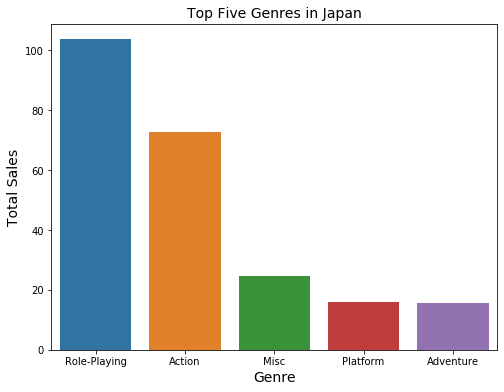

In [61]:
platform_jp = relevant_data.pivot_table(index = "genre", values="jp_sales", aggfunc="sum")\
.sort_values(by="jp_sales", ascending=False)[:5]
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.barplot(x=platform_jp.index, y="jp_sales", data=platform_jp, ax=ax, capsize=10)
ax.set_title("Top Five Genres in Japan", fontdict={"size":14})
plt.ylabel("Total Sales", fontdict={"size":14})
plt.xlabel("Genre", fontdict={"size":14})
plt.show()

Action and Shooter genres are dominating the market share of sales in Europe and North America.
Role_Playing and Action are dominating the market share of sales in Japan. The means Action genre is at least among the top two dominating Genres across the three regions.

**Do ESRB ratings affect sales in individual regions?**

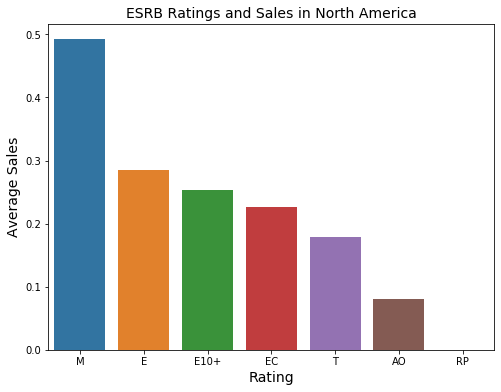

In [62]:
platform_na = relevant_data.pivot_table(index = "rating", values="na_sales")\
.sort_values(by="na_sales", ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.barplot(x=platform_na.index, y="na_sales", data=platform_na, ax=ax, capsize=10)
ax.set_title("ESRB Ratings and Sales in North America", fontdict={"size":14})
plt.ylabel("Average Sales", fontdict={"size":14})
plt.xlabel("Rating", fontdict={"size":14})
plt.show()

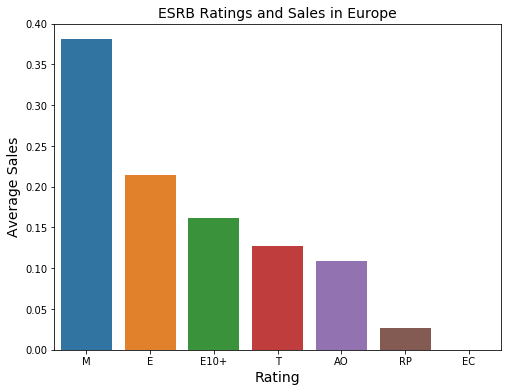

In [63]:
platform_eu = relevant_data.pivot_table(index = "rating", values="eu_sales")\
.sort_values(by="eu_sales", ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.barplot(x=platform_eu.index, y="eu_sales", data=platform_eu, ax=ax, capsize=10)
ax.set_title("ESRB Ratings and Sales in Europe", fontdict={"size":14})
plt.ylabel("Average Sales", fontdict={"size":14})
plt.xlabel("Rating", fontdict={"size":14})
plt.show()

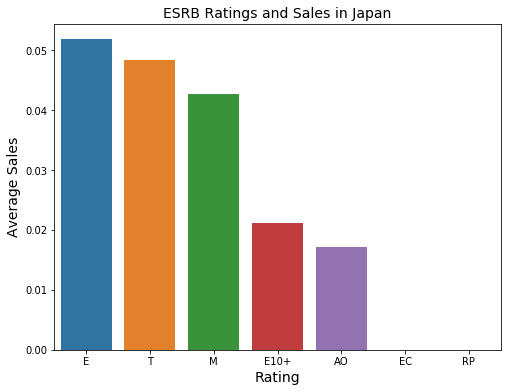

In [64]:
platform_jp = relevant_data.pivot_table(index = "rating", values="jp_sales")\
.sort_values(by="jp_sales", ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.barplot(x=platform_jp.index, y="jp_sales", data=platform_jp, ax=ax, capsize=10)
ax.set_title("ESRB Ratings and Sales in Japan", fontdict={"size":14})
plt.ylabel("Average Sales", fontdict={"size":14})
plt.xlabel("Rating", fontdict={"size":14})
plt.show()

ESRB ratings affect sales in individual regions. On average, in Europe and North America, `Mature` rating corresponds the most to games sales compared to other ratings. On average, games rated `EC`, `AO`, and `RP` are the least selling in Europe and North America.
In Japan, on average, ESRB rating "Everyone" sells the most games. `AO`, `EC`, `RP` ratings like in other regions, sells the least. On average, `Mature` and `Everyone` ratings are among the top three dominating ESRB rating across the three regions.

## Step 5. Testing hypotheses

### Hypothesis test 1

H0: Average user ratings of the Xbox One and PC platforms are the same.

H1: Average user ratings of the Xbox One and PC platforms are different.

The initial claim was that average user ratings of the Xbox One and PC platforms are the same. This is a null hypothetical claim since equalitly is assumed. I therefore, used this statement as "H0" and the opposing statement as the alternative hypothesis (H1). There are other significant levels such as 1% and 10% but the most used is alpha = 5%. Hence,I will choose my alpha value to be 0.05 in both hypotheses.

In [65]:
xone_platform= relevant_data.query('platform=="XOne"')
xone_platform=xone_platform.query('user_score!= "nan"') 
pc_platform= relevant_data.query('platform=="PC"')
pc_platform=pc_platform.query('user_score!= "nan"') 

print("Variance:")
print("xone Platform = ",round(np.var(xone_platform["user_score"]),0))
print("PC platform =",round(np.var(pc_platform["user_score"]),0))
print()

alpha = .05 
results = st.ttest_ind(xone_platform["user_score"], pc_platform["user_score"],equal_var=False)

print('p-value: {:.4f}'.format(results.pvalue))


if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

Variance:
xone Platform =  3.0
PC platform = 4.0

p-value: 0.9064
We can't reject the null hypothesis


The result gives evidence to support the claim that the average user ratings of the Xbox One and PC platforms are the same.

### Hypothesis test 2

H0: Average user ratings for the Action and Sports genres are the same.

H1: Average user ratings for the Action and Sports genres are different.
    
The initial claim was that average user ratings for the Action and Sports genres are different. This claim does not assume equality. Therefore, it is an alternative hypothetical claim. So I used it as H1, and the reverse statement as the H0.

In [66]:
action= relevant_data.query('genre=="Action"')
action=action.query('user_score!= "nan"')
sports= relevant_data.query('genre=="Sports"')
sports=sports.query('user_score!= "nan"')

print("Variance:")
print("Action Genre = ",round(np.var(action["user_score"]),0))
print("Sports Genre =",round(np.var(sports["user_score"]),0))
print()

alpha = .05 
results = st.ttest_ind(action["user_score"], sports["user_score"])

print('p-value: {:.4f}'.format(results.pvalue))


if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

Variance:
Action Genre =  7.0
Sports Genre = 6.0

p-value: 0.0015
We reject the null hypothesis


There result gives enough evidence to support the claim that average user ratings for the Action and Sports genres are different.

## Step 6. General conclusion

- Before 1994, there was no year that more than 100 games were released. However, from 1994 to 2016, more than 100 games have been released every year. 
- PS, PS2, and Nintendo DS used to be popular platforms but now have zero sales.
- Generally, it takes about a year or less for new platforms to appear. On average, old plaforms take about 8 years to fade.
- Atari 2600 platform existed for the longest number of years (35 years)
- Since 2010, the most profitable platforms are 'PS3', '3DS', 'DS', 'PC', 'PS4', 'Wii', 'X360', and 'XOne'. In sum total, 'PS3' and 'X360' are leading in sales.
- In 2016, all plaforms had experienced their peak sales and started shrinking, but PS4, XOne, and 3DS were leading in sales.
- Since 2010, average sales on various platforms differed but not significantly different especially among the highest performing plaforms as average sales were all below USD 1.00 million. PS4 had the highest average sales of about USD 0.80 million, and GBA platform had about USD 0.05 million sales (the lowest).
- There is positive correlation between review of plaforms and sale of games.
- Generally, from 2010, Action genres have been the most profitable considering sum of total yearly sales. However,on average, the most profitable genre is Shooter. The least profitable game genre is Puzzle.
- PS3 and X360 platforms dominate sales in Europe and North American markets.
- Nintendo 3DS and PS3 dominates market share in Japan.  
- PS3 platform is at least among top two dominant market share of games across Europe, North America, and Japan.
- Action and Shooter genres are dominating the market share of sales in Europe and North America while Role_Playing and Action dominates in Japan. 
- Action genre is at least among the top two dominating genres across the three regions.
- ESRB ratings affect sales in individual regions.
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for Action and Sports genres are different.